In [3]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [4]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [6]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [8]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    j_history = []
    p_history = []
    b = b_in
    #w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 1000000:
            j_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: cost: {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e} ",
                  f"w: {w: 0.3e}, b: {b:0.5e}")
    return w, b, j_history, p_history


In [12]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient_descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: cost: 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02  w:  6.500e+00, b: 4.00000e+00
Iteration 1000: cost: 3.41e+00  dj_dw: -3.712e-01, dj_db: 6.007e-01  w:  1.949e+02, b: 1.08228e+02
Iteration 2000: cost: 7.93e-01  dj_dw: -1.789e-01, dj_db: 2.895e-01  w:  1.975e+02, b: 1.03966e+02
Iteration 3000: cost: 1.84e-01  dj_dw: -8.625e-02, dj_db: 1.396e-01  w:  1.988e+02, b: 1.01912e+02
Iteration 4000: cost: 4.28e-02  dj_dw: -4.158e-02, dj_db: 6.727e-02  w:  1.994e+02, b: 1.00922e+02
Iteration 5000: cost: 9.95e-03  dj_dw: -2.004e-02, dj_db: 3.243e-02  w:  1.997e+02, b: 1.00444e+02
Iteration 6000: cost: 2.31e-03  dj_dw: -9.660e-03, dj_db: 1.563e-02  w:  1.999e+02, b: 1.00214e+02
Iteration 7000: cost: 5.37e-04  dj_dw: -4.657e-03, dj_db: 7.535e-03  w:  1.999e+02, b: 1.00103e+02
Iteration 8000: cost: 1.25e-04  dj_dw: -2.245e-03, dj_db: 3.632e-03  w:  2.000e+02, b: 1.00050e+02
Iteration 9000: cost: 2.90e-05  dj_dw: -1.082e-03, dj_db: 1.751e-03  w:  2.000e+02, b: 1.00024e+02
(w,b) fou

Text(0.5, 0, 'iteration_step')

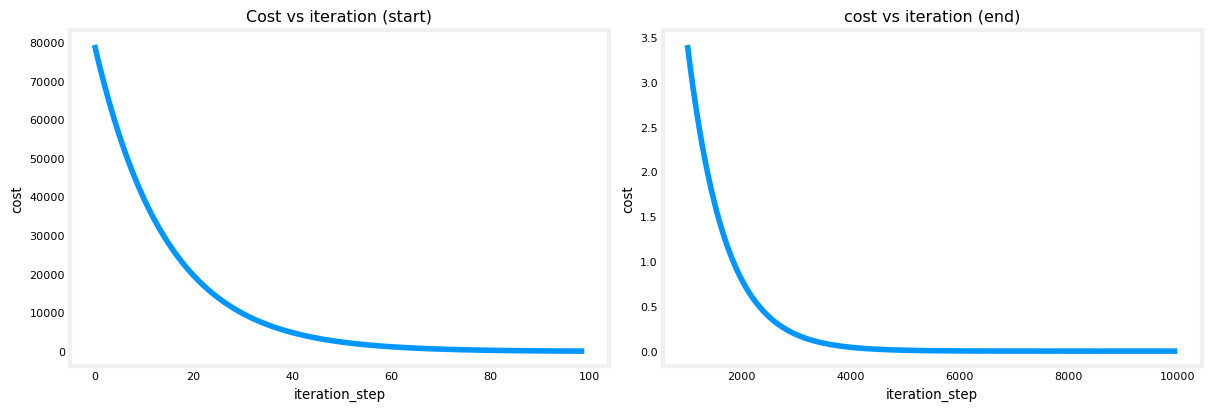

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title('Cost vs iteration (start)')
ax2.set_title('cost vs iteration (end)')
ax1.set_ylabel('cost')
ax2.set_ylabel('cost')
ax1.set_xlabel('iteration_step')
ax2.set_xlabel('iteration_step')

In [17]:
# predictions
print(f"1000 sqft house: {w_final*1.0 + b_final:0.1f}")
print(f"1200 sqft house: {w_final*1.2 + b_final:0.1f}")
print(f"2000 sqft house: {w_final*2.0 + b_final:0.1f}")


1000 sqft house: 300.0
1200 sqft house: 340.0
2000 sqft house: 500.0
